# Energy consumption of training Stable Diffusion
Author: Mathilde Jay    
Date: 01/08/2023

### Summary
- Analysis of energy consumed
- Analysis of power timeseries
    - by components
    - in total
- Analysis of ML stats

The results were first processed using the script "process_results.py" : 
```
python utils/process_results.py --analysis_git_dir "/home/mjay/ai-energy-consumption-framework" --result_folder "/home/mjay/laion/pokemon/results_31_07"
```
You need to add the Jupyter extension of VSCode. You will have to select a kernel, my advice is to take the one that's proposed and install everything that's recommended.
You don't need a lot of librairies in addition to the one we already installed - I don't have the list but just install them if you get an error. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

## Description of results

In [3]:
files = [
    # "/home/mjay/laion/pokemon/results_12_07/",
    #"/home/mjay/laion/pokemon/results_12_07_adrien/",
    "/home/mjay/laion/pokemon/results_31_07/",
]
exp_table = pd.DataFrame()
energy_df = pd.DataFrame()
for f in files:
    table = pd.read_csv(f+"processed_table.csv")
    exp_table = pd.concat([exp_table, table])
    energy = pd.read_csv(f+"timeseries.csv")
    energy["exp_table_path"]=f+"processed_table.csv"
    energy_df = pd.concat([energy_df, energy])
    
exp_table.T

/home/mjay/.conda/envs/gpu_benchmark/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
experiment_start,1690820023.480957,1690820509.947278,1690820955.953352,1690821382.075191,1690821808.191404,1690822354.365705,1690822900.456044,1690823406.595112,1690823917.690579,1690824558.830758,...,1690875927.257425,1690876353.303665,1690876899.416753,1690877440.547005,1690877951.680709,1690878462.867589,1690879104.590889,1690879750.801974,1690880342.344329,1690880933.616353
experiment_end,1690820506.757032,1690820953.110558,1690821379.201101,1690821805.31516,1690822351.433136,1690822897.544145,1690823403.694464,1690823914.812267,1690824555.930377,1690825197.195273,...,1690876350.457576,1690876896.494495,1690877437.669479,1690877948.833023,1690878459.993549,1690879101.285645,1690879747.912381,1690880339.184804,1690880930.712683,1690881386.836788
tool_csv_file_nvml,/home/mjay/laion/pokemon/results_31_07//3085_0...,/home/mjay/laion/pokemon/results_31_07//20587_...,/home/mjay/laion/pokemon/results_31_07//2690_0...,/home/mjay/laion/pokemon/results_31_07//30293_...,/home/mjay/laion/pokemon/results_31_07//8449_0...,/home/mjay/laion/pokemon/results_31_07//21910_...,/home/mjay/laion/pokemon/results_31_07//18737_...,/home/mjay/laion/pokemon/results_31_07//4162_0...,/home/mjay/laion/pokemon/results_31_07//19252_...,/home/mjay/laion/pokemon/results_31_07//20985_...,...,/home/mjay/laion/pokemon/results_31_07//20403_...,/home/mjay/laion/pokemon/results_31_07//3243_0...,/home/mjay/laion/pokemon/results_31_07//23667_...,/home/mjay/laion/pokemon/results_31_07//26899_...,/home/mjay/laion/pokemon/results_31_07//25507_...,/home/mjay/laion/pokemon/results_31_07//981_0/...,/home/mjay/laion/pokemon/results_31_07//12395_...,/home/mjay/laion/pokemon/results_31_07//31424_...,/home/mjay/laion/pokemon/results_31_07//14247_...,/home/mjay/laion/pokemon/results_31_07//2485_0...
tool_csv_file_rapl,/home/mjay/laion/pokemon/results_31_07//3085_0...,/home/mjay/laion/pokemon/results_31_07//20587_...,/home/mjay/laion/pokemon/results_31_07//2690_0...,/home/mjay/laion/pokemon/results_31_07//30293_...,/home/mjay/laion/pokemon/results_31_07//8449_0...,/home/mjay/laion/pokemon/results_31_07//21910_...,/home/mjay/laion/pokemon/results_31_07//18737_...,/home/mjay/laion/pokemon/results_31_07//4162_0...,/home/mjay/laion/pokemon/results_31_07//19252_...,/home/mjay/laion/pokemon/results_31_07//20985_...,...,/home/mjay/laion/pokemon/results_31_07//20403_...,/home/mjay/laion/pokemon/results_31_07//3243_0...,/home/mjay/laion/pokemon/results_31_07//23667_...,/home/mjay/laion/pokemon/results_31_07//26899_...,/home/mjay/laion/pokemon/results_31_07//25507_...,/home/mjay/laion/pokemon/results_31_07//981_0/...,/home/mjay/laion/pokemon/results_31_07//12395_...,/home/mjay/laion/pokemon/results_31_07//31424_...,/home/mjay/laion/pokemon/results_31_07//14247_...,/home/mjay/laion/pokemon/results_31_07//2485_0...
tool_csv_file_sysinfo,/home/mjay/laion/pokemon/results_31_07//3085_0...,/home/mjay/laion/pokemon/results_31_07//20587_...,/home/mjay/laion/pokemon/results_31_07//2690_0...,/home/mjay/laion/pokemon/results_31_07//30293_...,/home/mjay/laion/pokemon/results_31_07//8449_0...,/home/mjay/laion/pokemon/results_31_07//21910_...,/home/mjay/laion/pokemon/results_31_07//18737_...,/home/mjay/laion/pokemon/results_31_07//4162_0...,/home/mjay/laion/pokemon/results_31_07//19252_...,/home/mjay/laion/pokemon/results_31_07//20985_...,...,/home/mjay/laion/pokemon/results_31_07//20403_...,/home/mjay/laion/pokemon/results_31_07//3243_0...,/home/mjay/laion/pokemon/results_31_07//23667_...,/home/mjay/laion/pokemon/results_31_07//26899_...,/home/mjay/laion/pokemon/results_31_07//25507_...,/home/mjay/laion/pokemon/results_31_07//981_0/...,/home/mjay/laion/pokemon/results_31_07//12395_...,/home/mjay/laion/pokemon/results_31_07//31424_...,/home/mjay/laion/pokemon/results_31_07//14247_...,/home/mjay/laion/pokemon/results_31_07//2485_0...
tool_energy_consumption(kWh),0.137675,0.132342,0.122883,0.122835,0.179995,0.179854,0.082273,0.082456,0.11318,0.113

In [4]:
energy_df.head()

,timestamp,device_index,energy_consumption_since_previous_measurement_milliJ,instantaneous_power_milliW,global_utilization_percent,global_memory_percent,timestamp_sec,domain,socket,cpu,utilization_percent,exp_table_index,power(W),exp_table_path
0,1690820024149,0.0,24437.0,44487.0,0.0,0.0,0.55,NaN,NaN,NaN,NaN,0,48.874,/home/mjay/laion/pokemon/results_31_07/process...
1,1690820024149,1.0,23402.0,42558.0,0.0,0.0,0.55,NaN,NaN,NaN,NaN,0,46.804,/home/mjay/laion/pokemon/results_31_07/process...
2,1690820024149,2.0,23651.0,43040.0,0.0,0.0,0.55,NaN,NaN,NaN,NaN,0,47.302,/home/mjay/laion/pokemon/results_31_07/process...
3,1690820024149,3.0,23316.0,42558.0,0.0,0.0,0.55,NaN,NaN,NaN,NaN,0,46.632,/home/mjay/laion/pokemon/results_31_07/process...
4,1690820024149,4.0,23323.0,42586.0,0.0,0.0,0.55,NaN,NaN,NaN,NaN,0,46.646,/home/mjay/laion/pokemon/results_31_07/process...


## Energy consumed by each experiments
"tool_energy_consumption(kWh)" is the sum of all the energy data - including the sleep times.   
"bench_energy_consumption(kWh)" is the sum of the energy data when removed the sleep times. It's not as precise as having a timestamp of the time at which the training actually starts but I didn't have time to fix this issue.
Below the table is the equivalent in a bar plot, but averaged over seeds.

In [6]:
exp_table.groupby([
       'max_train_samples', 'gradient_accumulation_steps','model_version', 'train_batch_size',
        'num_train_epochs',
       'seed']).mean()[["tool_energy_consumption(kWh)", "bench_energy_consumption(kWh)"]]

tool_energy_consumption(kWh)  \
max_train_samples gradient_accumulation_steps model_version train_batch_size num_train_epochs seed                                 
400.0             1.0                         v1-1          4.0              15.0             4                         0.137675   
                                                                                              71                        0.132342   
                                              v1-2          4.0              15.0             4                         0.067057   
                                                                                              71                        0.066359   
                                              v1-3          4.0              15.0             4                         0.066880   
                                                                                              71                        0.066441   
                                              v1-4          4.0              15.0             4                         0.066673   
                  2.0                         v1-1          4.0              15.0             4                         0.122883   
                                                                                              71                        0.122835   
                                              v1-2          4.0              15.0             4                         0.061608   
                                                                                              71                        0.061040   
                                              v1-3          4.0              15.0             4                         0.061145   
                                                                                              71                        0.061344   
600.0             1.0                         v1-1          4.0              15.0             4                         0.179995   
                                                                                              71                        0.179854   
                                              v1-2          4.0              15.0             4                         0.089578   
                                                                                              71                        0.089360   
                                              v1-3          4.0              15.0             4                         0.089706   
                                                                                              71                        0.089433   
                  2.0                         v1-1          4.0              15.0             4                         0.082273   
                                                                                              71                        0.082456   
                                              v1-2          4.0              15.0             4                         0.082361   
                                                                                              71                        0.082477   
                                              v1-3          4.0              15.0             4                         0.082589   
                                                                                              71                        0.082429   
800.0             1.0                         v1-1          4.0              15.0             4                         0.113180   
                                                                                              71                        0.113250   
                                              v1-2          4.0              15.0             4                         0.113186   
                                                                                              71                        0.113123   
        

/home/mjay/.local/lib/python3.7/site-packages/numpy/core/_methods.py:43: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/mjay/.local/lib/python3.7/site-packages/numpy/core/_methods.py:39: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


<AxesSubplot:xlabel='max_train_samples,gradient_accumulation_steps,model_version'>

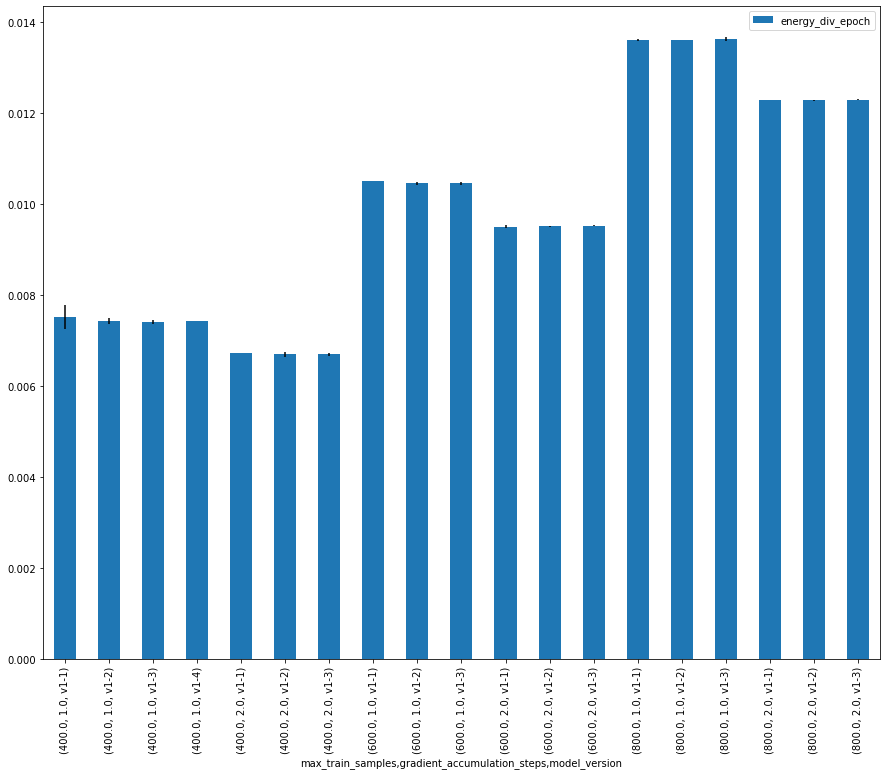

In [7]:
fig, ax = plt.subplots(figsize=(15,12))
plot_df = exp_table.groupby([
       'max_train_samples',
       'gradient_accumulation_steps',   
       'model_version',
       ])
plot_df.mean().plot(
  ax=ax, 
  y=["energy_div_epoch"],  # energy_div_epoch bench_energy_consumption(kWh)
  kind="bar", 
  rot=90,
  yerr=plot_df.std(),
  )

## Regression in the number of samples used for the training
From the previous bar plot, I assume that the energy consumed is the same for every version of the model (v1.1 to v1.4) - as predicited. 
The first table is the data you asked for: the energy consumed for the training. You can notice that the standart deviation (var) is really low.
For the next, I set the gradient accummulation to 1 and I apply a linear regression to be able to predict the energy consumed for any number of samples.

In [37]:
# si on suppose que la version du modèle n'impacte pas l'énergie consommée
print("average over model version")
exp_table.groupby([
       'max_train_samples', 'gradient_accumulation_steps']).aggregate(['mean', 'var'])[["bench_energy_consumption(kWh)", "energy_div_epoch"]]

average over model version


bench_energy_consumption(kWh)  \
                                                                       mean   
max_train_samples gradient_accumulation_steps                                 
400.0             1.0                                              0.111693   
                  2.0                                              0.100535   
600.0             1.0                                              0.157074   
                  2.0                                              0.142716   
800.0             1.0                                              0.204192   
                  2.0                                              0.184301   

                                                            energy_div_epoch  \
                                                        var             mean   
max_train_samples gradient_accumulation_steps                                  
400.0             1.0                          3.245724e-06         0.007446   
                  2.0                          2.194851e-07         0.006702   
600.0             1.0                          2.430682e-07         0.010472   
                  2.0                          7.620162e-08         0.009514   
800.0             1.0                          1.051237e-07         0.013613   
                  2.0                          2.154875e-08         0.012287   

                                                             
                                                        var  
max_train_samples gradient_accumulation_steps                
400.0             1.0                          1.442544e-08  
                  2.0                          9.754894e-10  
600.0             1.0                          1.080303e-09  
                  2.0                          3.386739e-10  
800.0             1.0                          4.672162e-10  
                  2.0                          9.577223e-11

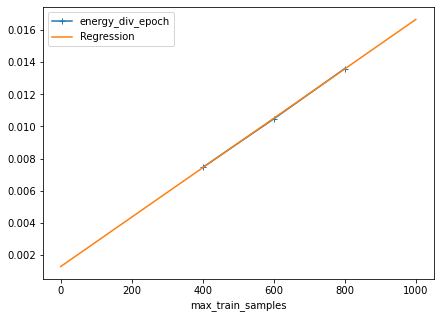

In [11]:
table = exp_table[exp_table["gradient_accumulation_steps"]==1].groupby([
       'max_train_samples']).mean()[["energy_div_epoch"]]

# apply regression 
X = np.array(table.index).reshape(-1, 1)
y = table.values
reg = LinearRegression().fit(X, y)

fig, ax = plt.subplots(figsize=(7,5))
ax = table.plot(ax=ax, marker="+", label="Measures")
les_x = range(0,1100, 200)
les_y = [reg.coef_[0][0]*x + reg.intercept_[0] for x in les_x]
ax.plot(les_x, les_y, label="Regression")
ax.legend()


In [40]:
@interact
def predict_energy_epoch(x=(0, 10**5, 100)):
    energy = reg.coef_[0][0]*x + reg.intercept_[0]
    return f"For {x} samples and a gradient accumulation of 1, the predicted energy consumed by epochs is {energy.round(3)} kWh."

interactive(children=(IntSlider(value=50000, description='x', max=100000, step=100), Output()), _dom_classes=(…

## Let's have a look at the power time series
To simplify the analysis, I select 1 to 4 experiments to compare.

In [18]:
model_selection = exp_table["model_version"].isin(["v1-1", "v1-2"])
batch_selection = exp_table["train_batch_size"]==4
grad_selection = exp_table["gradient_accumulation_steps"]==2
dataset_selection = exp_table["max_train_samples"]==400
epoch_selection = exp_table["num_train_epochs"]==15
selected_df = exp_table[model_selection][batch_selection][grad_selection][dataset_selection][epoch_selection]
selected_df[["model_version"]]

/home/mjay/.conda/envs/gpu_benchmark/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,model_version
2,v1-1
3,v1-1
14,v1-2
15,v1-2


#### Code for components

In [19]:
energy_col = "energy_consumption_since_previous_measurement_milliJ"
energy_col = "power(W)"

In [20]:

def plot_energy_components(ax, energy_df, index, energy_col):
    plot_df = energy_df[energy_df["exp_table_index"]==index]
    for label, df in plot_df.groupby(["device_index"]):
        df.plot(
            x="timestamp_sec", 
            y=energy_col, 
            ax=ax, 
            label="GPU energy "+str(label),
            )
    for label, df in plot_df.groupby(["domain", "socket"]):
        df.plot(
            x="timestamp_sec", 
            y=energy_col, 
            ax=ax, 
            label=label,
            )
    ax.legend(
        bbox_to_anchor=(0.5,-0.1), 
        loc='upper center',
        fontsize=20,
        ncol=2
    )
    ax.set_title(index)
    return ax

#### Code for total energy

In [21]:
def plot_energy_total(ax, energy_df, energy_col, index):
    plot_df = energy_df[energy_df["exp_table_index"]==index]
    plot_df[(plot_df["device_index"].notna())].groupby(["timestamp_sec"]).sum().plot(
        # x="timestamp_sec", 
        y=energy_col, 
        ax=ax, 
        label="GPU energy",
        )
    plot_df[(plot_df["domain"]=="Dram")].groupby(["timestamp_sec"]).sum().plot(
        # x="timestamp_sec", 
        y=energy_col, 
        ax=ax, 
        label="RAM energy",
        )
    plot_df[(plot_df["domain"]=="Package")].groupby(["timestamp_sec"]).sum().plot(
        # x="timestamp_sec", 
        y=energy_col, 
        ax=ax, 
        label="CPU energy",
        )
    ax.legend(
        bbox_to_anchor=(0.5,-0.1), 
        loc='upper center',
        fontsize=20,
        ncol=2
    )
    ax.set_title("Energy of components")
    return ax
    

#### Code for usage

In [46]:
def plot_utilization(ax, energy_df, index):
    plot_df = energy_df[energy_df["exp_table_index"]==index]
    plot_df[
        (plot_df["device_index"].notna())
        
        ].plot(x="timestamp_sec", y="global_utilization_percent", ax=ax, label="GPU utilization")
    plot_df[
        (plot_df["device_index"].notna())
        ].plot(x="timestamp_sec", y="global_memory_percent", ax=ax, label="GPU mem utilization")
    plot_df[
        (plot_df["utilization_percent"].notna())
        ].groupby("timestamp_sec").mean().plot(ax=ax, y="utilization_percent", label="CPU avg utilization")
    ax.legend(
        bbox_to_anchor=(0.5,-0.1), 
        loc='upper center',
        fontsize=20,
        ncol=2
    )
    return ax

### Let's plot all this

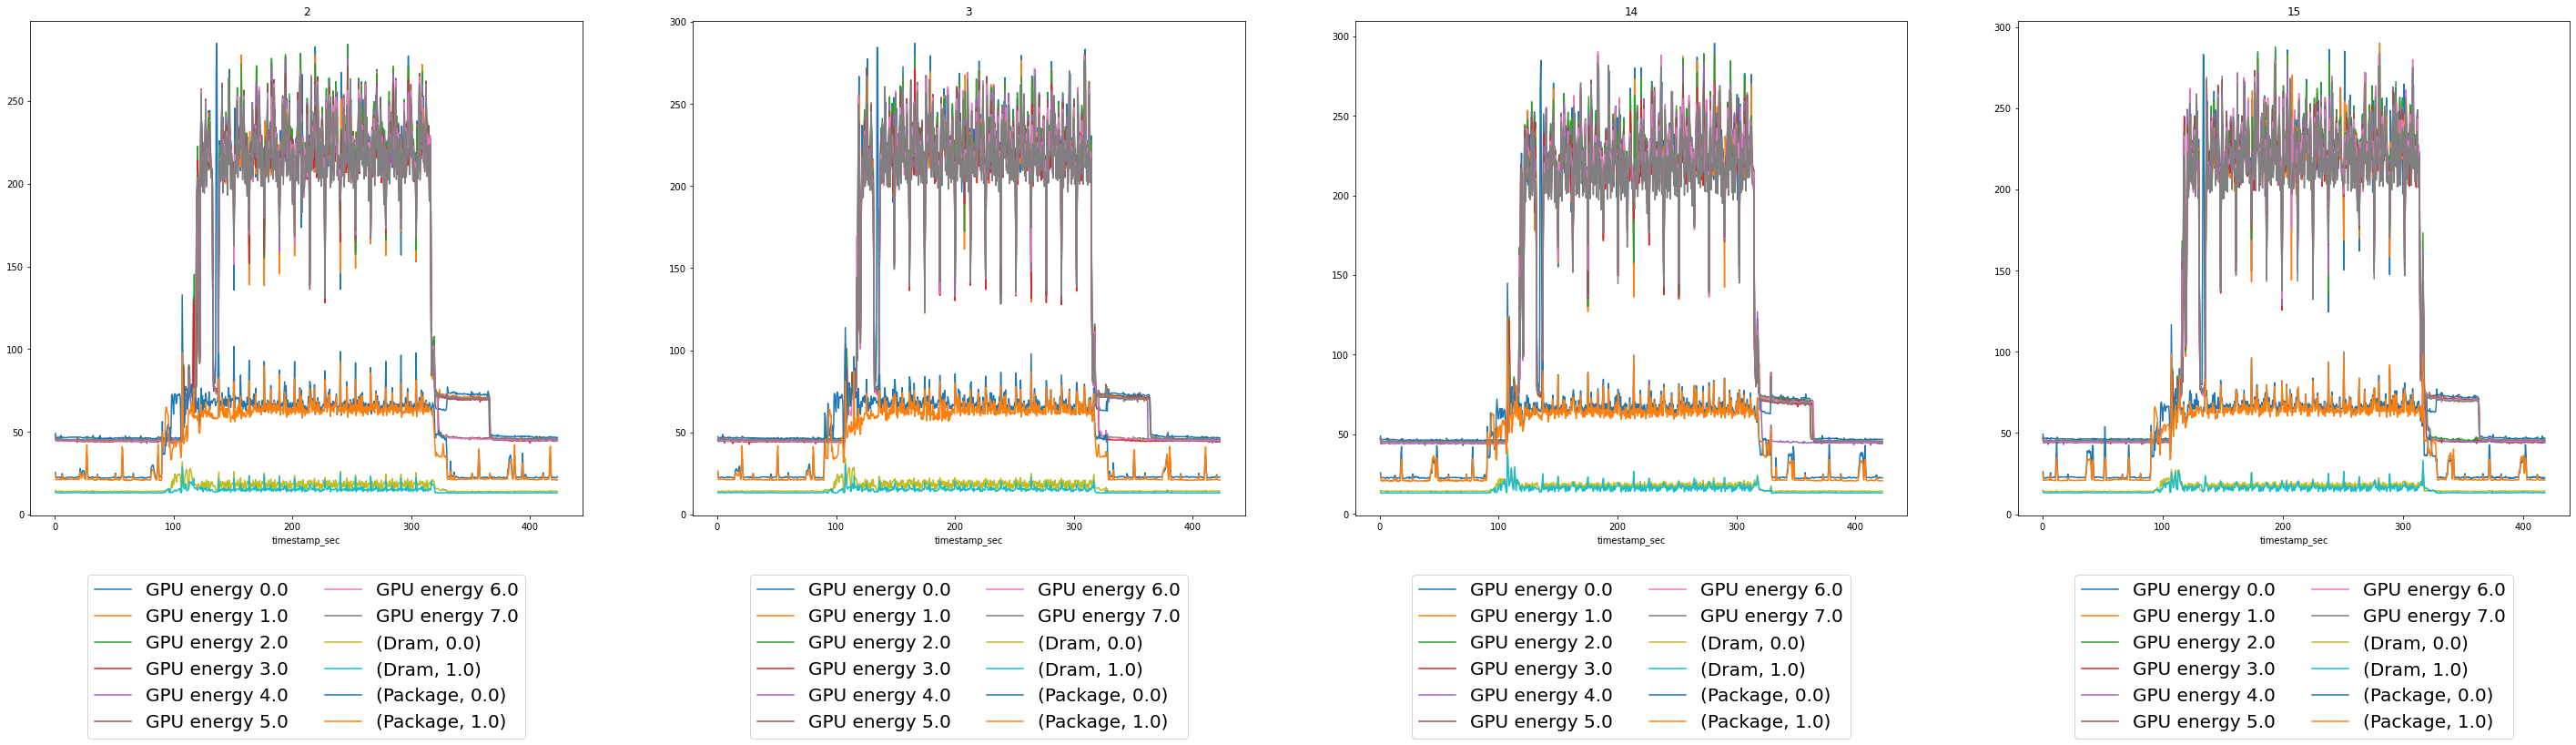

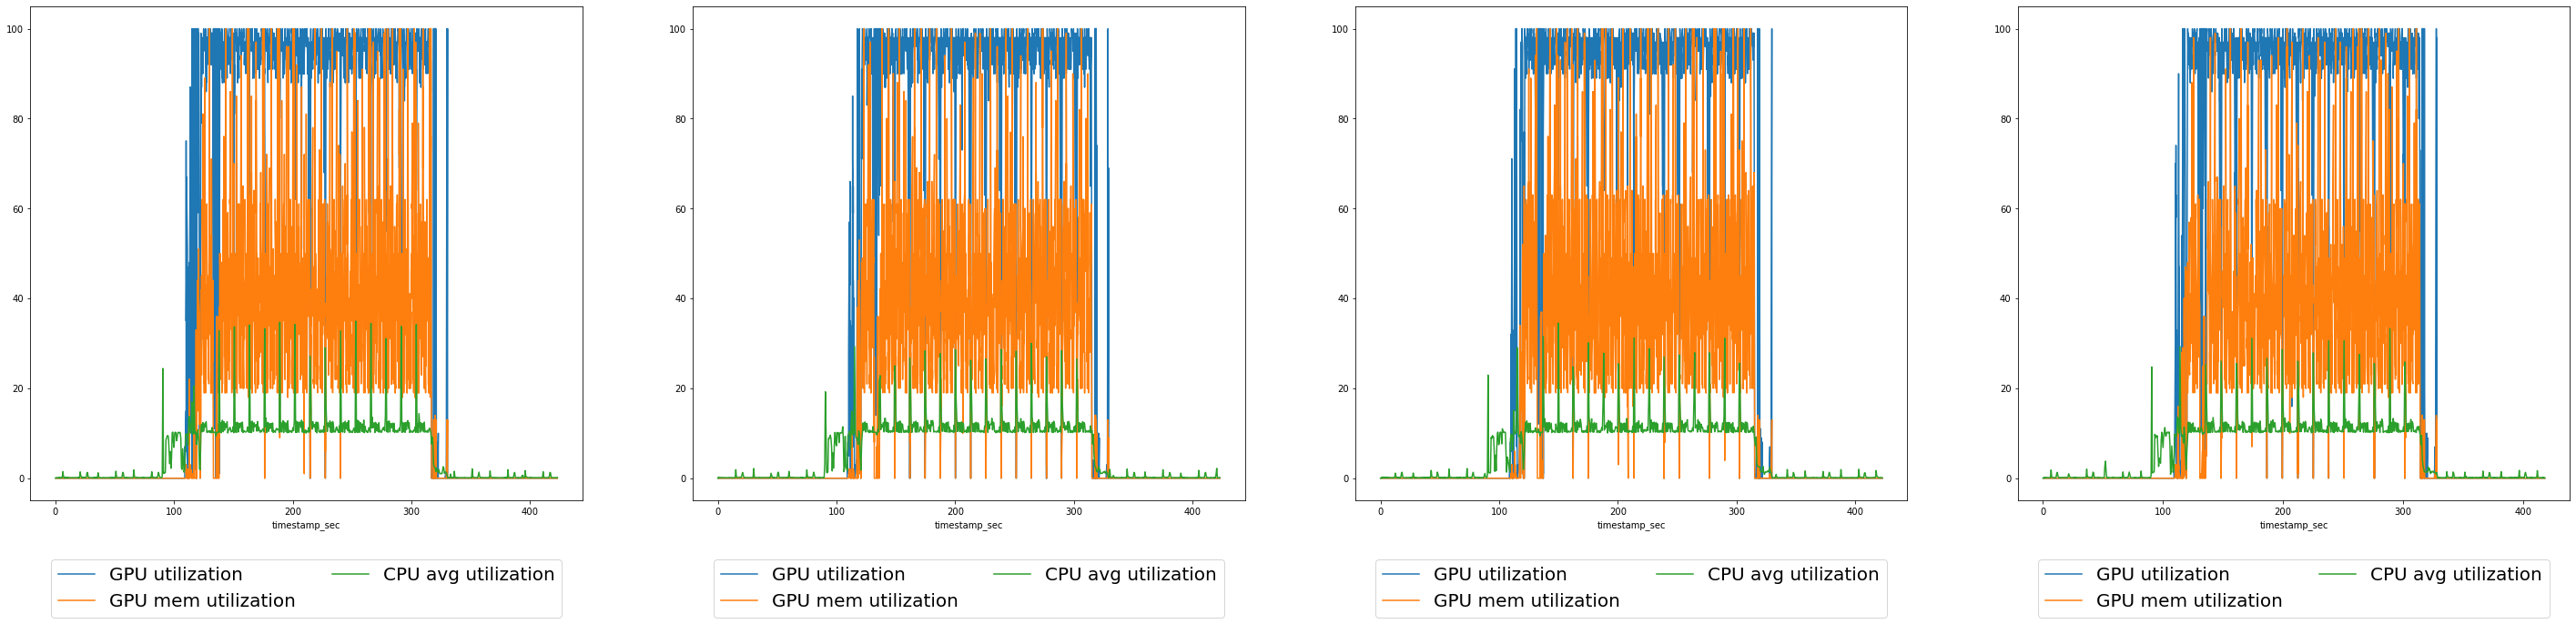

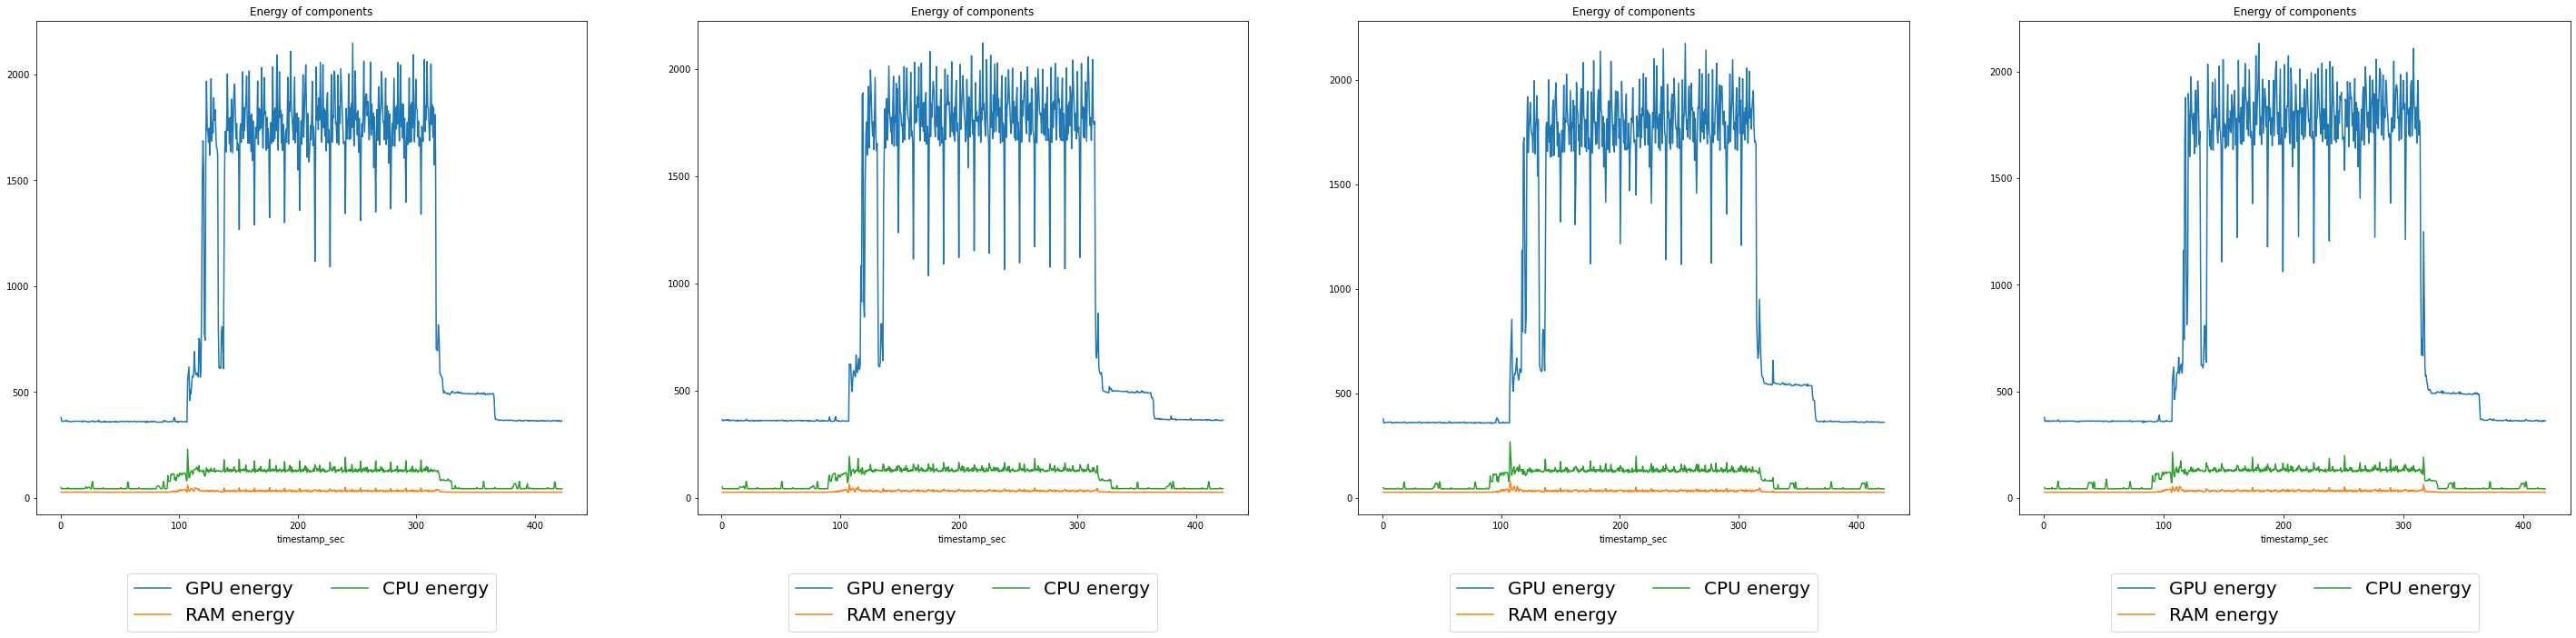

In [48]:
figsize = (50,10)
fig, ax_c = plt.subplots(1, len(selected_df), figsize=figsize)
fig, ax_t = plt.subplots(1, len(selected_df), figsize=figsize)
fig, ax_u = plt.subplots(1, len(selected_df), figsize=figsize)
for i, index in enumerate(selected_df.index):
    ax = plot_energy_components(ax_c[i], energy_df, index, energy_col)
    ax = plot_utilization(ax_t[i], energy_df, index)
    ax = plot_energy_total(ax_u[i], energy_df, energy_col, index)

We can see that there are drops in the power consumed by the GPU - probably at the end of each epoch since they are 15 peaks. The peak is always longer at the end of the first epoch, maybe an evaluation is done? 

### Stats from the tensorboard
I wanted to add the data from the tensorboad which is supposed to gather the time at which the epoch/steps starts. But as you can see below, the timestamps are identical for the first 5 epochs which makes me think that the GPUs don't synchronize very often. I was not able to fix this issue.
I also had a timestamp conversion issue that prevented me from adding tags to the power timeseries. 

In [24]:
ml_df = pd.read_csv(selected_df.result_dir.values[0]+"logs/tb.csv")

ml_df.columns

Index(['step', 'tag', 'value'], dtype='object')

In [49]:
ml_df["tag"].unique()

array(['backpropagate_end', 'backpropagate_start', 'epoch_end',
       'epoch_start', 'get_losses_end', 'get_losses_start',
       'saving_results', 'step_end', 'step_start', 'sync_gradients',
       'train_loss', 'validation_end', 'validation_start'], dtype=object)

<AxesSubplot:xlabel='step'>

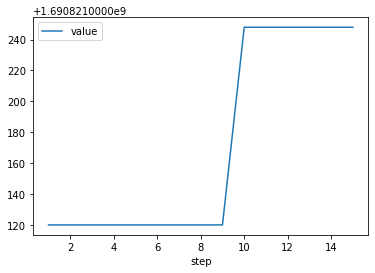

In [25]:

ml_df["timestamp"]=ml_df["value"]*10**(3)

ml_df[ml_df["tag"]=="epoch_start"].plot(x="step", y="value")
#ici step = epoch

<AxesSubplot:xlabel='step'>

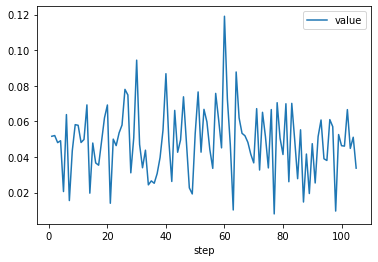

In [50]:
ml_df[ml_df["tag"]=="train_loss"].plot(x="step", y="value")

The loss don't seem to decrease a lot during the first 15 epochs - but our dataset is very small.